# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [64]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [98]:
df = pd.read_csv('/content/superstore_retail_orders (1).csv')

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [128]:
df.dropna(inplace=True)
df['total_amount'] = df['quantity'] * df['product_price']

df_clean = df[(df['total_amount'] < 4000) & (df['product_price'] < 8000) & (df['quantity'] < 25)]

df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], errors='coerce')

df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])

df_clean['order_date_numeric'] = df_clean['order_date'].astype(int)

print(df_clean.describe())

           order_id      quantity  product_price  total_amount  \
count  54167.000000  54167.000000   54167.000000  54167.000000   
mean   61643.172891      1.490059     613.900139    685.271681   
std     7517.884754      0.610049     816.329792    853.480142   
min    45079.000000      1.000000       2.290000      2.290000   
25%    55624.000000      1.000000       7.950000     14.970000   
50%    61856.000000      1.000000     475.600000    475.600000   
75%    68063.000000      2.000000     914.620000   1000.440000   
max    74147.000000      5.000000    3578.270000   3578.270000   

       order_date_numeric  
count        5.416700e+04  
mean         1.625646e+18  
std          3.609445e+17  
min         -9.223372e+18  
25%          1.633392e+18  
50%          1.641773e+18  
75%          1.649635e+18  
max          1.880323e+18  


<ipython-input-128-887f2f639a0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], errors='coerce')
<ipython-input-128-887f2f639a0b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])
<ipython-input-128-887f2f639a0b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [95]:
if not isinstance(df_clean, pd.DataFrame):
    raise TypeError("df_clean must be a Pandas DataFrame")

df_clean.columns


Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'quantity', 'product_name', 'product_line',
       'product_price', 'total_amount', 'order_date_numeric'],
      dtype='object')

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue
- Create a bar chart
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

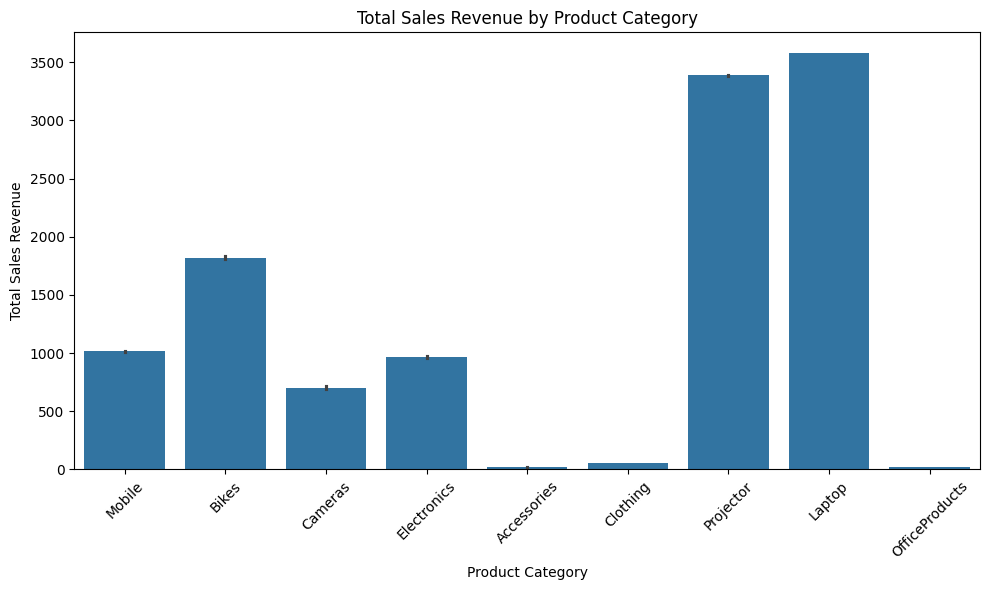

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(x='product_line', y='total_amount', data=df_clean)
plt.title('Total Sales Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


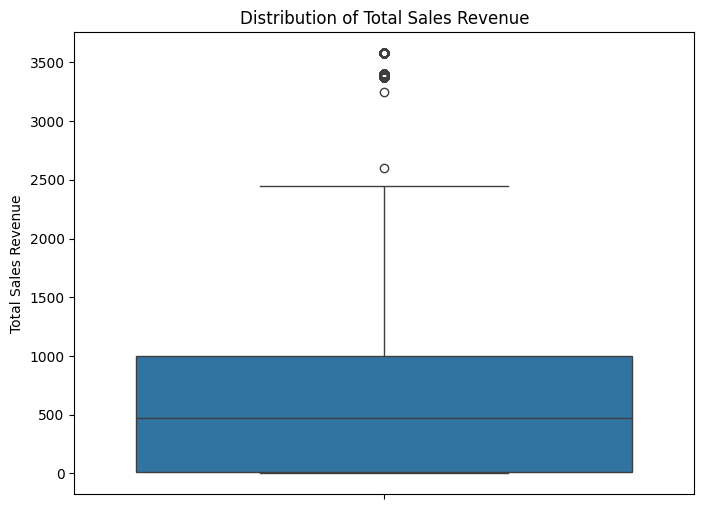

In [116]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='total_amount', data=df_clean)
plt.title('Distribution of Total Sales Revenue')
plt.ylabel('Total Sales Revenue')
plt.show()


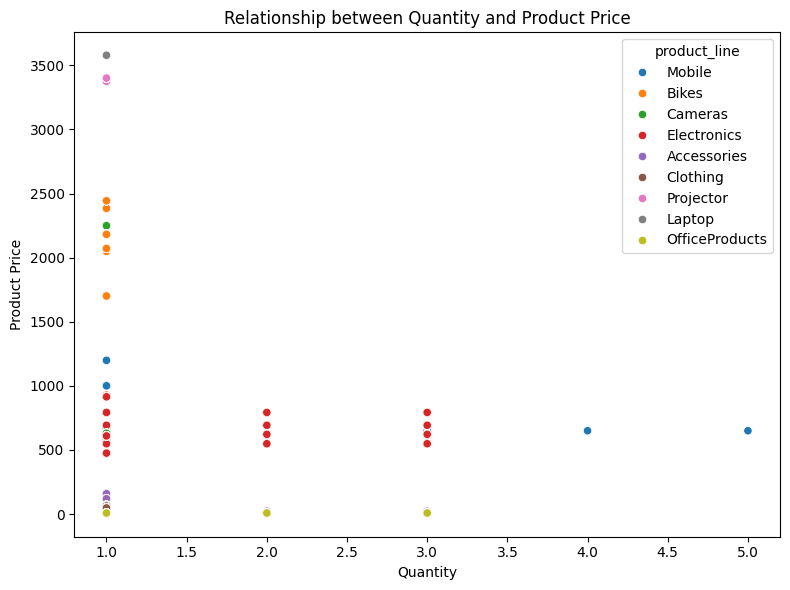

In [113]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='quantity', y='product_price', data=df_clean, hue='product_line')
plt.title('Relationship between Quantity and Product Price')
plt.xlabel('Quantity')
plt.ylabel('Product Price')
plt.tight_layout()
plt.show()

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales  
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

In [118]:
df_clean['order_month'] = df_clean['order_date'].dt.month

monthly_sales = df_clean.groupby('order_month')['total_amount'].sum().reset_index()

<ipython-input-118-72478a68efc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_month'] = df_clean['order_date'].dt.month


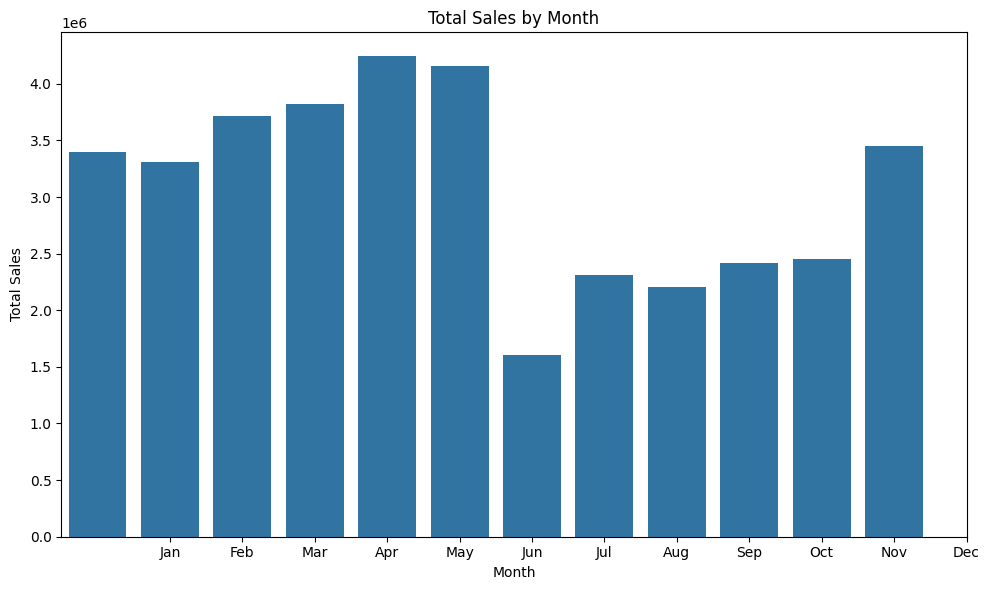

In [119]:
plt.figure(figsize=(10, 6))
sns.barplot(x='order_month', y='total_amount', data=monthly_sales)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [121]:
state_sales = df_clean.groupby('state_province')['total_amount'].sum().reset_index()
best_states = state_sales.sort_values(by='total_amount', ascending=False).head(5)
worst_states = state_sales.sort_values(by='total_amount', ascending=True).head(5)

print("Best states for sales:")
print(best_states)
print("\nWorst states for sales:")
print(worst_states)

Best states for sales:
               state_province  total_amount
2   ARIZONA                       914399.44
19  MAINE                         799138.27
3   ARKANSAS                      791679.00
39  OREGON                        791617.90
47  UTAH                          781546.45

Worst states for sales:
               state_province  total_amount
5   CANADA                         13158.16
22  MEXICO                         13516.71
46  TX                             92439.61
36  NY                            103379.57
1   ALASKA                        578340.86


In [123]:
product_sales = df_clean.groupby('product_line')['total_amount'].sum().reset_index()
best_product = product_sales.sort_values(by='total_amount', ascending=False).head(1)
worst_product = product_sales.sort_values(by='total_amount', ascending=True).head(1)

print("\nBest product for sales:")
print(best_product)
print("\nWorst product for sales:")
print(worst_product)


Best product for sales:
  product_line  total_amount
1        Bikes   16682536.63

Worst product for sales:
     product_line  total_amount
7  OfficeProducts      35441.28
